# Neural Networks

## Scikits learn's Multi Layer Perceptron Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [45]:
import pandas as pd

data = pd.read_csv("kommune_multivariate.csv")
data.head()

,Unnamed: 0,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,...,Fylke_9,Fylke_10,Fylke_11,Fylke_12,Fylke_14,Fylke_15,Fylke_18,Fylke_19,Fylke_20,Fylke_50
0,0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.000000,6.0,...,0,0,0,0,0,0,1,0,0,0
1,1,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.000000,6.0,...,0,0,0,0,0,0,1,0,0,0
2,2,7.0,6.0,6.0,6.0,6.0,4.0,5.0,5.999987,6.0,...,0,0,0,0,0,0,0,0,0,0
3,3,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.000000,6.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.000000,5.0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
data = data.drop(['Unnamed: 0'],axis=1)
data = data.drop(['Id'],axis=1)

In [47]:
print(data.shape)
data = data.dropna() 
print(data.shape)

(3359, 148)
(3220, 148)


In [48]:
data = data[data.Q16 != 11.0]
data = data[data.Q16 != 12.0]
data = data[data.Q16 != 13.0]

In [49]:
import math
import numpy as np

shuffled = data.iloc[np.random.permutation(len(data))]

test = shuffled[:320] 
train = shuffled[320:]

test_y = test['Q16']
train_y = train['Q16']

test_X = test.drop(['Q16'],axis=1).values
train_X = train.drop(['Q16'],axis=1).values

In [50]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=10000).fit(train_X, train_y)

In [51]:
from sklearn.metrics import accuracy_score

preds = clf.predict(test_X) 
print("Accuracy:",accuracy_score(test_y, preds))

Accuracy: 0.25


In [52]:
from sklearn.model_selection import cross_val_score
scores_mlp = cross_val_score(clf, train_X, train_y, cv=5)
print(scores_mlp)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_mlp.mean(), scores_mlp.std()))

[0.26535088 0.25       0.21491228 0.27631579 0.2989011 ]
0.26 accuracy with a standard deviation of 0.03


      1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
1.0     27    10    19     3     1     0     9     8     5     1
2.0      7     3    12     1     0     0     3     0     1     1
3.0     23     8    33     1     2     2     3     6     1     1
4.0      2     3     4     2     0     0     2     1     1     1
5.0      4     1     5     0     3     0     1     2     2     0
6.0      2     1     2     0     1     0     1     0     1     0
7.0      8     3    10     3     1     0     4     2     1     2
8.0     10     1     2     0     5     0     3     4     2     0
9.0      3     0     6     0     0     1     1     1     4     0
10.0     2     0     5     0     1     0     2     0     0     0


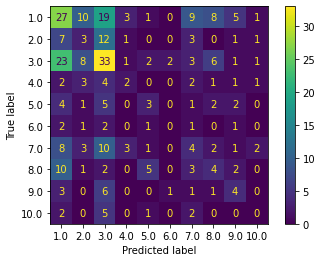

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

conmat = confusion_matrix(test_y, preds)
val = np.mat(conmat) 

classnames = list(set(train["Q16"]))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

print(df_cm)

plot_confusion_matrix(clf,test_X,test_y)
plt.savefig("cm_mlp.png")

## Self-defined Neural Network

Using this tutorial: 
https://medium.com/luca-chuangs-bapm-notes/build-a-neural-network-in-python-multi-class-classification-e940f74bd899

In [10]:
# for reading data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping

In [11]:
test_y.head()

2756    9.0
710     3.0
2440    3.0
3202    3.0
551     3.0
Name: Q16, dtype: float64

In [25]:
dummy_y_test = pd.get_dummies(data=test_y, prefix='parti')

In [26]:
dummy_y_train = pd.get_dummies(data=train_y, prefix='parti')

In [14]:
# build a model
model = Sequential()
model.add(Input(shape=(train_X.shape[1],))) # input shape is (features,)
model.add(Dense(train_X.shape[1], activation='relu'))
model.add(Dense(train_X.shape[1], activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 147)               21756     
_________________________________________________________________
dense_1 (Dense)              (None, 147)               21756     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1480      
Total params: 44,992
Trainable params: 44,992
Non-trainable params: 0
_________________________________________________________________


In [15]:
import keras
from keras.callbacks import EarlyStopping

# This callback will stop the training when there is no improvement in the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths

# now we just update our model fit call
history = model.fit(train_X,
                    dummy_y_train,
                    callbacks=[es],
                    epochs=1000, 
                    batch_size=1,
                    shuffle=True,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/1000
2051/2051 [==============================] - 26s 2ms/step - loss: 2.1560 - accuracy: 0.2719 - val_loss: 2.0646 - val_accuracy: 0.2588
Epoch 2/1000
2051/2051 [==============================] - 3s 2ms/step - loss: 1.9483 - accuracy: 0.2828 - val_loss: 1.9599 - val_accuracy: 0.2675
Epoch 3/1000
2051/2051 [==============================] - 3s 2ms/step - loss: 1.9492 - accuracy: 0.3259 - val_loss: 1.9178 - val_accuracy: 0.3026
Epoch 4/1000
2051/2051 [==============================] - 4s 2ms/step - loss: 1.8692 - accuracy: 0.3291 - val_loss: 1.8967 - val_accuracy: 0.2939
Epoch 5/1000
2051/2051 [==============================] - 4s 2ms/step - loss: 1.8646 - accuracy: 0.3424 - val_loss: 1.9094 - val_accuracy: 0.2939
Epoch 6/1000
2051/2051 [==============================] - 4s 2ms/step - loss: 1.8382 - accuracy: 0.3486 - val_loss: 1.9007 - val_accuracy: 0.3289
Epoch 7/1000
2051/2051 [==============================] - 5s 2ms/step - loss: 1.8539 - accuracy: 0.3354 - val_loss: 1.8514 

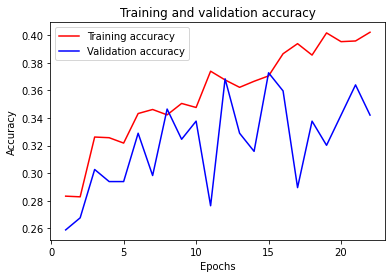

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

preds = model.predict(test_X) 

results = []

for i in range(len(preds)):
    num = (np.argmax(preds[i])) +1
    results.append(num)

print("Accuracy:",metrics.accuracy_score(test_y, results))

Accuracy: 0.325


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

conmat = confusion_matrix(test_y, results)
val = np.mat(conmat) 

classnames = list(set(train["Q16"]))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

print(df_cm)

      1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
1.0     65     1    21     1     0     0     0     0     0     0
2.0     20     0    14     0     0     0     1     0     0     0
3.0     57     3    37     0     0     0     0     0     0     0
4.0      7     0     1     0     0     0     0     0     0     0
5.0     14     0     0     0     1     0     0     2     0     0
6.0      3     0     1     0     0     0     0     0     0     0
7.0     21     0     3     0     0     0     1     0     0     0
8.0     14     0     0     0     3     0     0     0     0     0
9.0     16     1     3     0     0     1     0     1     0     0
10.0     2     1     3     0     0     0     0     1     0     0


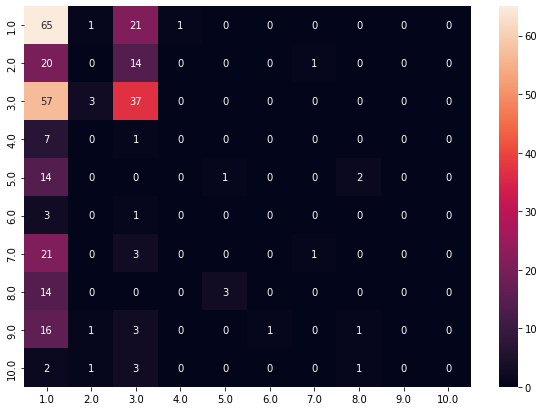

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.savefig("cm_ann.png")

In [44]:
scores = []

for i in range(5):
    test_split = i*580
    train_data = pd.concat([data[:test_split],data[test_split+580:]])
    test_data = data[test_split:test_split+580]
    
    test_y = test_data['Q16']
    train_y = train_data['Q16']
    
    test_X = test_data.drop(['Q16'],axis=1).values
    train_X = train_data.drop(['Q16'],axis=1).values
    
    dummy_y_test = pd.get_dummies(data=test_y, prefix='parti')
    dummy_y_train = pd.get_dummies(data=train_y, prefix='parti')

    # build a model
    model = Sequential()
    model.add(Input(shape=(train_X.shape[1],))) # input shape is (features,)
    model.add(Dense(train_X.shape[1], activation='relu'))
    model.add(Dense(train_X.shape[1], activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.summary()

    # compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # This callback will stop the training when there is no improvement in the validation loss for 10 consecutive epochs.  
    es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths

    # now we just update our model fit call
    history = model.fit(train_X,
                    dummy_y_train,
                    callbacks=[es],
                    epochs=1000, 
                    batch_size=1,
                    shuffle=True,
                    validation_split=0.1,
                    verbose=1)
    
    preds = model.predict(test_X) 

    results = []

    for i in range(len(preds)):
        num = (np.argmax(preds[i])) +1
        results.append(num)        
    
    accuracy = metrics.accuracy_score(test_y, results)
    scores.append(accuracy)
    print("Accuracy:",metrics.accuracy_score(test_y, results))


Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 147)               21756     
_________________________________________________________________
dense_100 (Dense)            (None, 147)               21756     
_________________________________________________________________
dense_101 (Dense)            (None, 10)                1480      
Total params: 44,992
Trainable params: 44,992
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1817/1817 [==============================] - 5s 2ms/step - loss: 2.2253 - accuracy: 0.2386 - val_loss: 1.9727 - val_accuracy: 0.2970
Epoch 2/1000
1817/1817 [==============================] - 3s 2ms/step - loss: 2.0069 - accuracy: 0.2791 - val_loss: 1.9951 - val_accuracy: 0.2921
Epoch 3/1000
1817/1817 [==============================] - 3s 2ms/step - loss: 1.9424 - 

1817/1817 [==============================] - 6s 2ms/step - loss: 2.2959 - accuracy: 0.2735 - val_loss: 2.0015 - val_accuracy: 0.2574
Epoch 2/1000
1817/1817 [==============================] - 4s 2ms/step - loss: 1.9489 - accuracy: 0.3099 - val_loss: 1.9484 - val_accuracy: 0.3020
Epoch 3/1000
1817/1817 [==============================] - 4s 2ms/step - loss: 1.9230 - accuracy: 0.3295 - val_loss: 1.9563 - val_accuracy: 0.2970
Epoch 4/1000
1817/1817 [==============================] - 4s 2ms/step - loss: 1.8574 - accuracy: 0.3481 - val_loss: 1.9151 - val_accuracy: 0.3069
Epoch 5/1000
1817/1817 [==============================] - 4s 2ms/step - loss: 1.8391 - accuracy: 0.3426 - val_loss: 1.8447 - val_accuracy: 0.3515
Epoch 6/1000
1817/1817 [==============================] - 3s 2ms/step - loss: 1.8013 - accuracy: 0.3399 - val_loss: 1.9537 - val_accuracy: 0.3218
Epoch 7/1000
1817/1817 [==============================] - 4s 2ms/step - loss: 1.7998 - accuracy: 0.3573 - val_loss: 1.8664 - val_accuracy

2088/2088 [==============================] - 6s 3ms/step - loss: 1.8369 - accuracy: 0.3537 - val_loss: 2.0597 - val_accuracy: 0.2802
Epoch 7/1000
2088/2088 [==============================] - 6s 3ms/step - loss: 1.8466 - accuracy: 0.3329 - val_loss: 2.1487 - val_accuracy: 0.2974
Epoch 8/1000
2088/2088 [==============================] - 6s 3ms/step - loss: 1.8308 - accuracy: 0.3624 - val_loss: 2.0657 - val_accuracy: 0.2845
Epoch 9/1000
2088/2088 [==============================] - 6s 3ms/step - loss: 1.8054 - accuracy: 0.3403 - val_loss: 2.1056 - val_accuracy: 0.2629
Epoch 10/1000
2088/2088 [==============================] - 5s 2ms/step - loss: 1.8134 - accuracy: 0.3468 - val_loss: 2.0992 - val_accuracy: 0.3060
Epoch 11/1000
2088/2088 [==============================] - 4s 2ms/step - loss: 1.7560 - accuracy: 0.3781 - val_loss: 2.0754 - val_accuracy: 0.2543
Epoch 12/1000
2088/2088 [==============================] - 4s 2ms/step - loss: 1.7913 - accuracy: 0.3658 - val_loss: 2.1805 - val_accur

In [43]:
import statistics

print("Accuracy of the 5 runs:")
print(scores)

print("\nMean and standard deviation of the accuracies:")
print("Mean: " + str(statistics.mean(scores)))
print("Standard deviation: " + str(statistics.stdev(scores)))

Accuracy of the 5 runs:
[0.28793103448275864, 0.2775862068965517, 0.3120689655172414, 0.3120689655172414, 0.32616487455197135]

Mean and standard deviation of the accuracies:
Mean: 0.3031640093931529
Standard deviation: 0.019836228159442693
